Testing some 2D slices of 3D plots

In [1]:
using IFSintegrals, Plots;

┌ Info: Precompiling IFSintegrals [2e7d41c8-7523-11ec-3fc2-377bcf57d765]
└ @ Base loading.jl:1423


Create IFS, as an array of similarities:

In [2]:
ρ = 0.41
IFS = [
    Similarity(ρ,[0,0])
    Similarity(ρ,[1-ρ,0])
    Similarity(ρ,[(1-ρ)/2,sqrt(3)*(1-ρ)/2])
    Similarity(ρ,[(1-ρ)/2,(1-ρ)/(2*sqrt(3))])
]
Γ = Attractor(IFS);

Set up the problem: 
$$S\phi = f \quad\text{on } \Gamma,$$ with wavenumber $k$, incident field $d$.

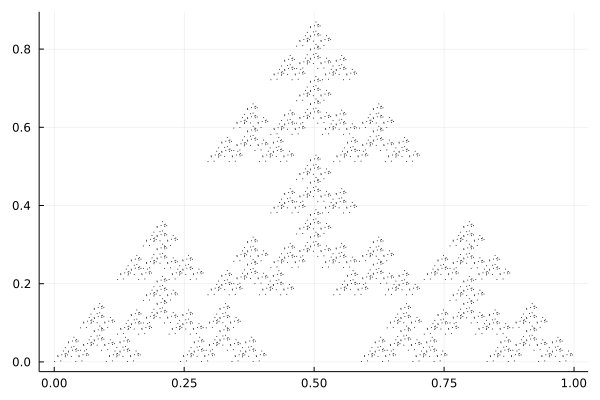

In [3]:
X = sketch_attractor(Γ);
scatter([X[j][1] for j=1:length(X)],[X[j][2] for j=1:length(X)],legend=:false,markerstrokewidth=0, markersize=0.1, markercolor="black")

In [4]:
k = 53
d = [0, 0, -1]
S = SingleLayer(Γ, k)
Sh = DiscreteBIO(S,0.1,0.01)
f(x) = exp(im*k*(d[1:2]'*x))
ϕ = Sh\f;

Constructing BEM system 100%|███████████████████████████| Time: 0:00:02


Now plot the solution in some slice of the domain:

In [5]:
X = IFSintegrals.slice([0.0,0.0],[1.0,1.0],0.0,5,5)
uˢ(x) = - single_layer_potential(Γ,k,ϕ,x)
uⁱ(x) = exp(im*k*(x*d')) # define inc field in domain
uᵗ(x) = uⁱ(x) + uˢ(x)

uᵗ (generic function with 1 method)

In [ ]:
using Traceur
@trace(uˢ.(X))

In [ ]:
@trace single_layer_potential(Γ,k,ϕ,rand(3))

In [7]:
heatmap(x_1,x_2,transpose(real(uˢ)),  aspect_ratio = 1, 
    title="Scattered field", legend=true, c = :thermal)

LoadError: MethodError: no method matching real(::typeof(uˢ))
[0mClosest candidates are:
[0m  real([91m::Union{MathOptInterface.SingleVariable, MathOptInterface.VectorOfVariables}[39m) at ~/.julia/packages/MathOptInterface/YDdD3/src/Utilities/functions.jl:3051
[0m  real([91m::Union{MathOptInterface.ScalarAffineFunction{T}, MathOptInterface.ScalarQuadraticFunction{T}, MathOptInterface.VectorAffineFunction{T}, MathOptInterface.VectorQuadraticFunction{T}} where T[39m) at ~/.julia/packages/MathOptInterface/YDdD3/src/Utilities/functions.jl:3044
[0m  real([91m::AbstractGray[39m) at ~/.julia/packages/ColorTypes/6m8P7/src/conversions.jl:117
[0m  ...

In [8]:
heatmap(x_1,x_2,transpose(real(vals)),  aspect_ratio = 1, 
    title="Total field", legend=true, c = :thermal)

LoadError: UndefVarError: vals not defined